In [1]:
# import libraries
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# define the data location and load data
cwd = os.getcwd()
pardir = os.path.dirname(cwd)
results_folder = os.path.join(pardir, "results", "video_pred_quan_eval_results")

print("results_folder:", results_folder)

results_folder: /scratch/groups/abrandt/solar_forecasting/GAN_project_new/results/video_pred_quan_eval_results


In [3]:
# mse results
mse_convlstm = np.load(os.path.join(results_folder,'ConvLSTM_mse.npy'))
mse_predrnnv2 = np.load(os.path.join(results_folder,'PredRNNv2_mse.npy'))
mse_phydnet = np.load(os.path.join(results_folder,'PhyDNet_mse.npy'))
mse_skyimagegan = np.load(os.path.join(results_folder,'SkyImageGAN_mse.npy'))
mse_videogpt = np.load(os.path.join(results_folder,'VideoGPT_4x4x4_mse_min.npy'))
mse_phygpt4x4x4 = np.load(os.path.join(results_folder,'PhyGPT_4x4x4_mse_min.npy'))
mse_phygpt1x4x4 = np.load(os.path.join(results_folder,'PhyGPT_1x4x4_mse_min.npy'))

# mae results
mae_convlstm = np.load(os.path.join(results_folder,'ConvLSTM_mae.npy'))
mae_predrnnv2 = np.load(os.path.join(results_folder,'PredRNNv2_mae.npy'))
mae_phydnet = np.load(os.path.join(results_folder,'PhyDNet_mae.npy'))
mae_skyimagegan = np.load(os.path.join(results_folder,'SkyImageGAN_mae.npy'))
mae_videogpt = np.load(os.path.join(results_folder,'VideoGPT_4x4x4_mae_min.npy'))
mae_phygpt4x4x4 = np.load(os.path.join(results_folder,'PhyGPT_4x4x4_mae_min.npy'))
mae_phygpt1x4x4 = np.load(os.path.join(results_folder,'PhyGPT_1x4x4_mae_min.npy'))

# ssim results
ssim_convlstm = np.load(os.path.join(results_folder,'ConvLSTM_ssim.npy'))
ssim_predrnnv2 = np.load(os.path.join(results_folder,'PredRNNv2_ssim.npy'))
ssim_phydnet = np.load(os.path.join(results_folder,'PhyDNet_ssim.npy'))
ssim_skyimagegan = np.load(os.path.join(results_folder,'SkyImageGAN_ssim.npy'))
ssim_videogpt = np.load(os.path.join(results_folder,'VideoGPT_4x4x4_ssim_max_recalculated.npy'))
ssim_phygpt4x4x4 = np.load(os.path.join(results_folder,'PhyGPT_4x4x4_ssim_max_recalculated.npy'))
ssim_phygpt1x4x4 = np.load(os.path.join(results_folder,'PhyGPT_1x4x4_ssim_max_recalculated.npy'))

# cosine similarity results
cosine_similarity_convlstm = np.load(os.path.join(results_folder,'ConvLSTM_cosine_similarity_block4_pool.npy'))
cosine_similarity_predrnnv2 = np.load(os.path.join(results_folder,'PredRNNv2_cosine_similarity_block4_pool.npy'))
cosine_similarity_phydnet = np.load(os.path.join(results_folder,'PhyDNet_cosine_similarity_block4_pool.npy'))
cosine_similarity_skyimagegan = np.load(os.path.join(results_folder,'SkyImageGAN_cosine_similarity_block4_pool.npy'))
cosine_similarity_videogpt = np.load(os.path.join(results_folder,'VideoGPT_4x4x4_cosine_similarity_max_block4pool.npy'))
cosine_similarity_phygpt4x4x4 = np.load(os.path.join(results_folder,'PhyGPT_4x4x4_cosine_similarity_max_block4pool.npy'))
cosine_similarity_phygpt1x4x4 = np.load(os.path.join(results_folder,'PhyGPT_1x4x4_cosine_similarity_max_block4pool.npy'))

In [4]:
cosine_similarity_per_frame_skygpt = np.load(os.path.join(results_folder,'cosine_similarity_skygpt_val_set_10_samplings_each_sample_all_time_steps.npy'))
cosine_similarity_per_frame_videogpt = np.load(os.path.join(results_folder,'cosine_similarity_videogpt_val_set_10_samplings_each_sample_all_time_steps.npy'))

In [5]:
#cosine_similarity_per_frame_skygpt_mean_over_all_sample = np.mean(cosine_similarity_per_frame_skygpt,axis=1) # in shape (10,8)
cosine_similarity_per_frame_skygpt_mean_over_10_samplings_and_mean_over_all_sample = np.mean(np.mean(cosine_similarity_per_frame_skygpt,axis=0),axis=0) # in shape (8,)
cosine_similarity_per_frame_skygpt_std_over_10_samplings_and_mean_over_all_sample = np.mean(np.std(cosine_similarity_per_frame_skygpt,axis=0),axis=0) # in shape (8,)

cosine_similarity_per_frame_videogpt_mean_over_10_samplings_and_mean_over_all_sample = np.mean(np.mean(cosine_similarity_per_frame_videogpt,axis=0),axis=0) # in shape (8,)
cosine_similarity_per_frame_videogpt_std_over_10_samplings_and_mean_over_all_sample = np.mean(np.std(cosine_similarity_per_frame_videogpt,axis=0),axis=0) # in shape (8,)

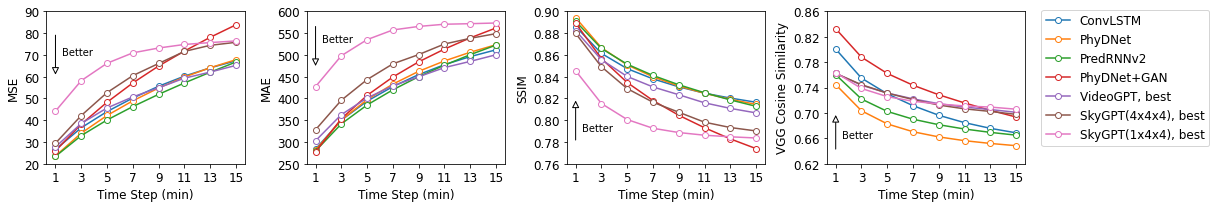

In [66]:
f,ax = plt.subplots(1,4,sharex=True)
f.set_size_inches((17,3))

timesteps = np.arange(1,17,2)
ax[0].plot(timesteps,mse_convlstm,'-o',markerfacecolor="white",label='ConvLSTM')
ax[0].plot(timesteps,mse_phydnet,'-o',markerfacecolor="white",label='PhyDNet')
ax[0].plot(timesteps,mse_predrnnv2,'-o',markerfacecolor="white",label='PredRNNv2')
ax[0].plot(timesteps,mse_skyimagegan,'-o',markerfacecolor="white",label='PhyDNet+GAN')
ax[0].plot(timesteps,mse_videogpt,'-o',markerfacecolor="white",label='VideoGPT')
ax[0].plot(timesteps,mse_phygpt4x4x4,'-o',markerfacecolor="white",label='SkyGPT(4x4x4), best')
ax[0].plot(timesteps,mse_phygpt1x4x4,'-o',markerfacecolor="white",label='SkyGPT(1x4x4), best')
ax[0].set_xticks(timesteps)
ax[0].set_xlabel('Time Step (min)',fontsize=12)
ax[0].set_ylabel('MSE',fontsize=12)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].set_ylim([20,90])
ax[0].set_yticks(np.arange(20,91,10))
ax[0].annotate('',xy=(1,60), xytext=(1,80),size=15,xycoords="data",
            arrowprops={'arrowstyle': "-|>",'fc':"w"}, va='center',ha="center")
ax[0].text(1.5,70,'Better')

ax[1].plot(timesteps,mae_convlstm,'-o',markerfacecolor="white",label='ConvLSTM')
ax[1].plot(timesteps,mae_phydnet,'-o',markerfacecolor="white",label='PhyDNet')
ax[1].plot(timesteps,mae_predrnnv2,'-o',markerfacecolor="white",label='PredRNNv2')
ax[1].plot(timesteps,mae_skyimagegan,'-o',markerfacecolor="white",label='PhyDNet+GAN')
ax[1].plot(timesteps,mae_videogpt,'-o',markerfacecolor="white",label='VideoGPT')
ax[1].plot(timesteps,mae_phygpt4x4x4,'-o',markerfacecolor="white",label='SkyGPT(4x4x4), best')
ax[1].plot(timesteps,mae_phygpt1x4x4,'-o',markerfacecolor="white",label='SkyGPT(1x4x4), best')
ax[1].set_xticks(timesteps)
ax[1].set_xlabel('Time Step (min)',fontsize=12)
ax[1].set_ylabel('MAE',fontsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].set_ylim([250,600])
ax[1].set_yticks(np.arange(250,601,50))
ax[1].annotate('',xy=(1,470), xytext=(1,570),size=15,xycoords="data",
            arrowprops={'arrowstyle': "-|>",'fc':"w"}, va='center',ha="center")
ax[1].text(1.5,530,'Better')

ax[2].plot(timesteps,ssim_convlstm,'-o',markerfacecolor="white",label='ConvLSTM')
ax[2].plot(timesteps,ssim_phydnet,'-o',markerfacecolor="white",label='PhyDNet')
ax[2].plot(timesteps,ssim_predrnnv2,'-o',markerfacecolor="white",label='PredRNNv2')
ax[2].plot(timesteps,ssim_skyimagegan,'-o',markerfacecolor="white",label='PhyDNet+GAN')
ax[2].plot(timesteps,ssim_videogpt,'-o',markerfacecolor="white",label='VideoGPT')
ax[2].plot(timesteps,ssim_phygpt4x4x4,'-o',markerfacecolor="white",label='SkyGPT(4x4x4), best')
ax[2].plot(timesteps,ssim_phygpt1x4x4,'-o',markerfacecolor="white",label='SkyGPT(1x4x4), best')
ax[2].set_xticks(timesteps)
ax[2].set_xlabel('Time Step (min)',fontsize=12)
ax[2].set_ylabel('SSIM',fontsize=12)
ax[2].tick_params(axis='both', which='major', labelsize=12)
ax[2].set_ylim([0.76,0.9])
ax[2].set_yticks(np.arange(0.76,0.91,0.02))
ax[2].annotate('',xy=(1,0.82), xytext=(1,0.78),size=15,xycoords="data",
            arrowprops={'arrowstyle': "-|>",'fc':"w"}, va='center',ha="center")
ax[2].text(1.5,0.79,'Better')

ax[3].plot(timesteps,cosine_similarity_convlstm,'-o',markerfacecolor="white",label='ConvLSTM')
ax[3].plot(timesteps,cosine_similarity_phydnet,'-o',markerfacecolor="white",label='PhyDNet')
ax[3].plot(timesteps,cosine_similarity_predrnnv2,'-o',markerfacecolor="white",label='PredRNNv2')
ax[3].plot(timesteps,cosine_similarity_skyimagegan,'-o',markerfacecolor="white",label='PhyDNet+GAN')
ax[3].plot(timesteps,cosine_similarity_videogpt,'-o',markerfacecolor="white",label='VideoGPT, best')
ax[3].plot(timesteps,cosine_similarity_phygpt4x4x4,'-o',markerfacecolor="white",label='SkyGPT(4x4x4), best')
ax[3].plot(timesteps,cosine_similarity_phygpt1x4x4,'-o',markerfacecolor="white",label='SkyGPT(1x4x4), best')
ax[3].set_xticks(timesteps)
ax[3].set_xlabel('Time Step (min)',fontsize=12)
ax[3].set_ylabel('VGG Cosine Similarity',fontsize=12)
ax[3].tick_params(axis='both', which='major', labelsize=12)
ax[3].set_ylim([0.62,0.86])
ax[3].set_yticks(np.arange(0.62,0.87,0.04))
ax[3].legend(bbox_to_anchor=(1.05, 1.05),ncol=1,fontsize=12)
ax[3].annotate('',xy=(1,0.70), xytext=(1,0.64),size=15,xycoords="data",
            arrowprops={'arrowstyle': "-|>",'fc':"w"}, va='center',ha="center")
ax[3].text(1.5,0.66,'Better')

f.tight_layout()
plt.savefig('quan_eval_results.pdf', bbox_inches='tight',dpi=300)
plt.show()

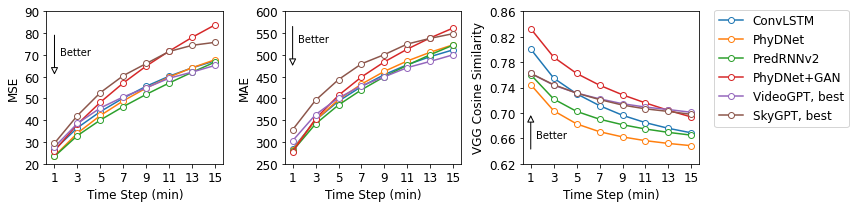

In [6]:
f,ax = plt.subplots(1,3,sharex=True)
f.set_size_inches((12,3))

timesteps = np.arange(1,17,2)
ax[0].plot(timesteps,mse_convlstm,'-o',markerfacecolor="white",label='ConvLSTM')
ax[0].plot(timesteps,mse_phydnet,'-o',markerfacecolor="white",label='PhyDNet')
ax[0].plot(timesteps,mse_predrnnv2,'-o',markerfacecolor="white",label='PredRNNv2')
ax[0].plot(timesteps,mse_skyimagegan,'-o',markerfacecolor="white",label='PhyDNet+GAN')
ax[0].plot(timesteps,mse_videogpt,'-o',markerfacecolor="white",label='VideoGPT')
ax[0].plot(timesteps,mse_phygpt4x4x4,'-o',markerfacecolor="white",label='SkyGPT(4x4x4), best')
#ax[0].plot(timesteps,mse_phygpt1x4x4,'-o',markerfacecolor="white",label='SkyGPT(1x4x4), best')
ax[0].set_xticks(timesteps)
ax[0].set_xlabel('Time Step (min)',fontsize=12)
ax[0].set_ylabel('MSE',fontsize=12)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].set_ylim([20,90])
ax[0].set_yticks(np.arange(20,91,10))
ax[0].annotate('',xy=(1,60), xytext=(1,80),size=15,xycoords="data",
            arrowprops={'arrowstyle': "-|>",'fc':"w"}, va='center',ha="center")
ax[0].text(1.5,70,'Better')

ax[1].plot(timesteps,mae_convlstm,'-o',markerfacecolor="white",label='ConvLSTM')
ax[1].plot(timesteps,mae_phydnet,'-o',markerfacecolor="white",label='PhyDNet')
ax[1].plot(timesteps,mae_predrnnv2,'-o',markerfacecolor="white",label='PredRNNv2')
ax[1].plot(timesteps,mae_skyimagegan,'-o',markerfacecolor="white",label='PhyDNet+GAN')
ax[1].plot(timesteps,mae_videogpt,'-o',markerfacecolor="white",label='VideoGPT')
ax[1].plot(timesteps,mae_phygpt4x4x4,'-o',markerfacecolor="white",label='SkyGPT(4x4x4), best')
#ax[1].plot(timesteps,mae_phygpt1x4x4,'-o',markerfacecolor="white",label='SkyGPT(1x4x4), best')
ax[1].set_xticks(timesteps)
ax[1].set_xlabel('Time Step (min)',fontsize=12)
ax[1].set_ylabel('MAE',fontsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].set_ylim([250,600])
ax[1].set_yticks(np.arange(250,601,50))
ax[1].annotate('',xy=(1,470), xytext=(1,570),size=15,xycoords="data",
            arrowprops={'arrowstyle': "-|>",'fc':"w"}, va='center',ha="center")
ax[1].text(1.5,530,'Better')

#ax[2].plot(timesteps,ssim_convlstm,'-o',markerfacecolor="white",label='ConvLSTM')
#ax[2].plot(timesteps,ssim_phydnet,'-o',markerfacecolor="white",label='PhyDNet')
#ax[2].plot(timesteps,ssim_predrnnv2,'-o',markerfacecolor="white",label='PredRNNv2')
#ax[2].plot(timesteps,ssim_skyimagegan,'-o',markerfacecolor="white",label='PhyDNet+GAN')
#ax[2].plot(timesteps,ssim_videogpt,'-o',markerfacecolor="white",label='VideoGPT')
#ax[2].plot(timesteps,ssim_phygpt4x4x4,'-o',markerfacecolor="white",label='SkyGPT(4x4x4), best')
#ax[2].plot(timesteps,ssim_phygpt1x4x4,'-o',markerfacecolor="white",label='SkyGPT(1x4x4), best')
#ax[2].set_xticks(timesteps)
#ax[2].set_xlabel('Time Step (min)',fontsize=12)
#ax[2].set_ylabel('SSIM',fontsize=12)
#ax[2].tick_params(axis='both', which='major', labelsize=12)
#ax[2].set_ylim([0.76,0.9])
#ax[2].set_yticks(np.arange(0.76,0.91,0.02))
#ax[2].annotate('',xy=(1,0.82), xytext=(1,0.78),size=15,xycoords="data",
#            arrowprops={'arrowstyle': "-|>",'fc':"w"}, va='center',ha="center")
#ax[2].text(1.5,0.79,'Better')

ax[2].plot(timesteps,cosine_similarity_convlstm,'-o',markerfacecolor="white",label='ConvLSTM')
ax[2].plot(timesteps,cosine_similarity_phydnet,'-o',markerfacecolor="white",label='PhyDNet')
ax[2].plot(timesteps,cosine_similarity_predrnnv2,'-o',markerfacecolor="white",label='PredRNNv2')
ax[2].plot(timesteps,cosine_similarity_skyimagegan,'-o',markerfacecolor="white",label='PhyDNet+GAN')
ax[2].plot(timesteps,cosine_similarity_videogpt,'-o',markerfacecolor="white",label='VideoGPT, best')
ax[2].plot(timesteps,cosine_similarity_phygpt4x4x4,'-o',markerfacecolor="white",label='SkyGPT, best')
#ax[2].plot(timesteps,cosine_similarity_phygpt1x4x4,'-o',markerfacecolor="white",label='SkyGPT(1x4x4), best')
ax[2].set_xticks(timesteps)
ax[2].set_xlabel('Time Step (min)',fontsize=12)
ax[2].set_ylabel('VGG Cosine Similarity',fontsize=12)
ax[2].tick_params(axis='both', which='major', labelsize=12)
ax[2].set_ylim([0.62,0.86])
ax[2].set_yticks(np.arange(0.62,0.87,0.04))
ax[2].legend(bbox_to_anchor=(1.05, 1.05),ncol=1,fontsize=12)
ax[2].annotate('',xy=(1,0.70), xytext=(1,0.64),size=15,xycoords="data",
            arrowprops={'arrowstyle': "-|>",'fc':"w"}, va='center',ha="center")
ax[2].text(1.5,0.66,'Better')

f.tight_layout()
plt.savefig('quan_eval_results_2.pdf', bbox_inches='tight',dpi=300)
plt.show()

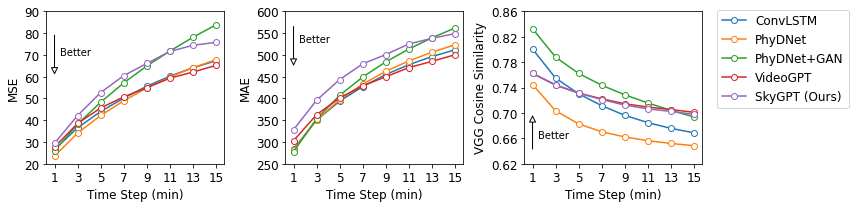

In [5]:
f,ax = plt.subplots(1,3,sharex=True)
f.set_size_inches((12,3))

timesteps = np.arange(1,17,2)
ax[0].plot(timesteps,mse_convlstm,'-o',markerfacecolor="white",label='ConvLSTM')
ax[0].plot(timesteps,mse_phydnet,'-o',markerfacecolor="white",label='PhyDNet')
#ax[0].plot(timesteps,mse_predrnnv2,'-o',markerfacecolor="white",label='PredRNNv2')
ax[0].plot(timesteps,mse_skyimagegan,'-o',markerfacecolor="white",label='PhyDNet+GAN')
ax[0].plot(timesteps,mse_videogpt,'-o',markerfacecolor="white",label='VideoGPT')
ax[0].plot(timesteps,mse_phygpt4x4x4,'-o',markerfacecolor="white",label='SkyGPT (Ours)')
#ax[0].plot(timesteps,mse_phygpt1x4x4,'-o',markerfacecolor="white",label='SkyGPT(1x4x4), best')
ax[0].set_xticks(timesteps)
ax[0].set_xlabel('Time Step (min)',fontsize=12)
ax[0].set_ylabel('MSE',fontsize=12)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].set_ylim([20,90])
ax[0].set_yticks(np.arange(20,91,10))
ax[0].annotate('',xy=(1,60), xytext=(1,80),size=15,xycoords="data",
            arrowprops={'arrowstyle': "-|>",'fc':"w"}, va='center',ha="center")
ax[0].text(1.5,70,'Better')

ax[1].plot(timesteps,mae_convlstm,'-o',markerfacecolor="white",label='ConvLSTM')
ax[1].plot(timesteps,mae_phydnet,'-o',markerfacecolor="white",label='PhyDNet')
#ax[1].plot(timesteps,mae_predrnnv2,'-o',markerfacecolor="white",label='PredRNNv2')
ax[1].plot(timesteps,mae_skyimagegan,'-o',markerfacecolor="white",label='PhyDNet+GAN')
ax[1].plot(timesteps,mae_videogpt,'-o',markerfacecolor="white",label='VideoGPT')
ax[1].plot(timesteps,mae_phygpt4x4x4,'-o',markerfacecolor="white",label='SkyGPT (Ours)')
#ax[1].plot(timesteps,mae_phygpt1x4x4,'-o',markerfacecolor="white",label='SkyGPT(1x4x4), best')
ax[1].set_xticks(timesteps)
ax[1].set_xlabel('Time Step (min)',fontsize=12)
ax[1].set_ylabel('MAE',fontsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].set_ylim([250,600])
ax[1].set_yticks(np.arange(250,601,50))
ax[1].annotate('',xy=(1,470), xytext=(1,570),size=15,xycoords="data",
            arrowprops={'arrowstyle': "-|>",'fc':"w"}, va='center',ha="center")
ax[1].text(1.5,530,'Better')

#ax[2].plot(timesteps,ssim_convlstm,'-o',markerfacecolor="white",label='ConvLSTM')
#ax[2].plot(timesteps,ssim_phydnet,'-o',markerfacecolor="white",label='PhyDNet')
#ax[2].plot(timesteps,ssim_predrnnv2,'-o',markerfacecolor="white",label='PredRNNv2')
#ax[2].plot(timesteps,ssim_skyimagegan,'-o',markerfacecolor="white",label='PhyDNet+GAN')
#ax[2].plot(timesteps,ssim_videogpt,'-o',markerfacecolor="white",label='VideoGPT')
#ax[2].plot(timesteps,ssim_phygpt4x4x4,'-o',markerfacecolor="white",label='SkyGPT(4x4x4), best')
#ax[2].plot(timesteps,ssim_phygpt1x4x4,'-o',markerfacecolor="white",label='SkyGPT(1x4x4), best')
#ax[2].set_xticks(timesteps)
#ax[2].set_xlabel('Time Step (min)',fontsize=12)
#ax[2].set_ylabel('SSIM',fontsize=12)
#ax[2].tick_params(axis='both', which='major', labelsize=12)
#ax[2].set_ylim([0.76,0.9])
#ax[2].set_yticks(np.arange(0.76,0.91,0.02))
#ax[2].annotate('',xy=(1,0.82), xytext=(1,0.78),size=15,xycoords="data",
#            arrowprops={'arrowstyle': "-|>",'fc':"w"}, va='center',ha="center")
#ax[2].text(1.5,0.79,'Better')

ax[2].plot(timesteps,cosine_similarity_convlstm,'-o',markerfacecolor="white",label='ConvLSTM')
ax[2].plot(timesteps,cosine_similarity_phydnet,'-o',markerfacecolor="white",label='PhyDNet')
#ax[2].plot(timesteps,cosine_similarity_predrnnv2,'-o',markerfacecolor="white",label='PredRNNv2')
ax[2].plot(timesteps,cosine_similarity_skyimagegan,'-o',markerfacecolor="white",label='PhyDNet+GAN')
ax[2].plot(timesteps,cosine_similarity_videogpt,'-o',markerfacecolor="white",label='VideoGPT')
ax[2].plot(timesteps,cosine_similarity_phygpt4x4x4,'-o',markerfacecolor="white",label='SkyGPT (Ours)')
#ax[2].plot(timesteps,cosine_similarity_phygpt1x4x4,'-o',markerfacecolor="white",label='SkyGPT(1x4x4), best')
ax[2].set_xticks(timesteps)
ax[2].set_xlabel('Time Step (min)',fontsize=12)
ax[2].set_ylabel('VGG Cosine Similarity',fontsize=12)
ax[2].tick_params(axis='both', which='major', labelsize=12)
ax[2].set_ylim([0.62,0.86])
ax[2].set_yticks(np.arange(0.62,0.87,0.04))
ax[2].legend(bbox_to_anchor=(1.05, 1.05),ncol=1,fontsize=12)
ax[2].annotate('',xy=(1,0.70), xytext=(1,0.64),size=15,xycoords="data",
            arrowprops={'arrowstyle': "-|>",'fc':"w"}, va='center',ha="center")
ax[2].text(1.5,0.66,'Better')

f.tight_layout()
plt.savefig('quan_eval_results_3.pdf', bbox_inches='tight',dpi=300)
plt.show()

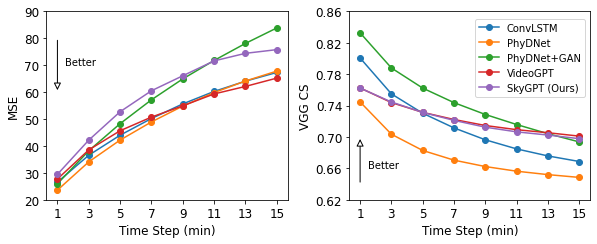

In [30]:
f,ax = plt.subplots(1,2,sharex=True)
f.set_size_inches((8.5,3.5))

timesteps = np.arange(1,17,2)
ax[0].plot(timesteps,mse_convlstm,'-o',label='ConvLSTM')
ax[0].plot(timesteps,mse_phydnet,'-o',label='PhyDNet')
#ax[0].plot(timesteps,mse_predrnnv2,'-o',label='PredRNNv2')
ax[0].plot(timesteps,mse_skyimagegan,'-o',label='PhyDNet+GAN')
ax[0].plot(timesteps,mse_videogpt,'-o',label='VideoGPT')
ax[0].plot(timesteps,mse_phygpt4x4x4,'-o',label='SkyGPT (Ours)')
#ax[0].plot(timesteps,mse_phygpt1x4x4,'-o',label='SkyGPT(1x4x4), best')
ax[0].set_xticks(timesteps)
ax[0].set_xlabel('Time Step (min)',fontsize=12)
ax[0].set_ylabel('MSE',fontsize=12)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].set_ylim([20,90])
ax[0].set_yticks(np.arange(20,91,10))
ax[0].annotate('',xy=(1,60), xytext=(1,80),size=15,xycoords="data",
            arrowprops={'arrowstyle': "-|>",'fc':"w"}, va='center',ha="center")
ax[0].text(1.5,70,'Better')

#ax[1].plot(timesteps,mae_convlstm,'-o',label='ConvLSTM')
#ax[1].plot(timesteps,mae_phydnet,'-o',label='PhyDNet')
##ax[1].plot(timesteps,mae_predrnnv2,'-o',label='PredRNNv2')
#ax[1].plot(timesteps,mae_skyimagegan,'-o',label='PhyDNet+GAN')
#ax[1].plot(timesteps,mae_videogpt,'-o',label='VideoGPT')
#ax[1].plot(timesteps,mae_phygpt4x4x4,'-o',label='SkyGPT (Ours)')
##ax[1].plot(timesteps,mae_phygpt1x4x4,'-o',label='SkyGPT(1x4x4), best')
#ax[1].set_xticks(timesteps)
#ax[1].set_xlabel('Time Step (min)',fontsize=12)
#ax[1].set_ylabel('MAE',fontsize=12)
#ax[1].tick_params(axis='both', which='major', labelsize=12)
#ax[1].set_ylim([250,600])
#ax[1].set_yticks(np.arange(250,601,50))
#ax[1].annotate('',xy=(1,470), xytext=(1,570),size=15,xycoords="data",
#            arrowprops={'arrowstyle': "-|>",'fc':"w"}, va='center',ha="center")
#ax[1].text(1.5,530,'Better')

#ax[2].plot(timesteps,ssim_convlstm,'-o',label='ConvLSTM')
#ax[2].plot(timesteps,ssim_phydnet,'-o',label='PhyDNet')
#ax[2].plot(timesteps,ssim_predrnnv2,'-o',label='PredRNNv2')
#ax[2].plot(timesteps,ssim_skyimagegan,'-o',label='PhyDNet+GAN')
#ax[2].plot(timesteps,ssim_videogpt,'-o',label='VideoGPT')
#ax[2].plot(timesteps,ssim_phygpt4x4x4,'-o',label='SkyGPT(4x4x4), best')
#ax[2].plot(timesteps,ssim_phygpt1x4x4,'-o',label='SkyGPT(1x4x4), best')
#ax[2].set_xticks(timesteps)
#ax[2].set_xlabel('Time Step (min)',fontsize=12)
#ax[2].set_ylabel('SSIM',fontsize=12)
#ax[2].tick_params(axis='both', which='major', labelsize=12)
#ax[2].set_ylim([0.76,0.9])
#ax[2].set_yticks(np.arange(0.76,0.91,0.02))
#ax[2].annotate('',xy=(1,0.82), xytext=(1,0.78),size=15,xycoords="data",
#            arrowprops={'arrowstyle': "-|>",'fc':"w"}, va='center',ha="center")
#ax[2].text(1.5,0.79,'Better')

ax[1].plot(timesteps,cosine_similarity_convlstm,'-o',label='ConvLSTM')
ax[1].plot(timesteps,cosine_similarity_phydnet,'-o',label='PhyDNet')
#ax[].plot(timesteps,cosine_similarity_predrnnv2,'-o',label='PredRNNv2')
ax[1].plot(timesteps,cosine_similarity_skyimagegan,'-o',label='PhyDNet+GAN')
ax[1].plot(timesteps,cosine_similarity_videogpt,'-o',label='VideoGPT')
ax[1].plot(timesteps,cosine_similarity_phygpt4x4x4,'-o',label='SkyGPT (Ours)')
#ax12].plot(timesteps,cosine_similarity_phygpt1x4x4,'-o',label='SkyGPT(1x4x4), best')
ax[1].set_xticks(timesteps)
ax[1].set_xlabel('Time Step (min)',fontsize=12)
ax[1].set_ylabel('VGG CS',fontsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].set_ylim([0.62,0.86])
ax[1].set_yticks(np.arange(0.62,0.87,0.04))
ax[1].legend(bbox_to_anchor=(0.5, 0.52),ncol=1,fontsize=10)
ax[1].annotate('',xy=(1,0.70), xytext=(1,0.64),size=15,xycoords="data",
            arrowprops={'arrowstyle': "-|>",'fc':"w"}, va='center',ha="center")
ax[1].text(1.5,0.66,'Better')

f.tight_layout()
plt.savefig('quan_eval_accuracy.pdf', bbox_inches='tight',dpi=300)
plt.show()

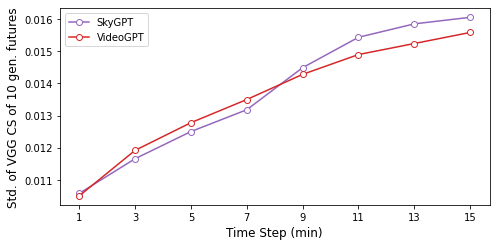

In [65]:
f,ax = plt.subplots()
f.set_size_inches((7,3.5))
timesteps = np.arange(1,17,2)

ax.plot(timesteps, cosine_similarity_per_frame_skygpt_std_over_10_samplings_and_mean_over_all_sample, '-o',markerfacecolor="white",color='#9467bd',label='SkyGPT')
ax.plot(timesteps, cosine_similarity_per_frame_videogpt_std_over_10_samplings_and_mean_over_all_sample,'-o',markerfacecolor="white",color='#d62728',label='VideoGPT')
ax.set_xticks(timesteps)
ax.set_xlabel('Time Step (min)',fontsize=12)
ax.set_ylabel('Std. of VGG CS of 10 gen. futures',fontsize=12)
#ax.grid(linestyle='--',dashes=(5, 10),axis='y')
ax.legend()
#ax.set_ylim([0.64,0.76])
#ax.set_yticks(np.arange(0.64,0.77,0.02))


f.tight_layout()
#plt.savefig('diversity_of_generated_samples_from_skygpt_and_videogpt.pdf', bbox_inches='tight',dpi=300)
plt.show()

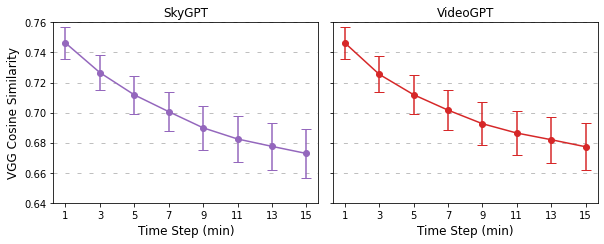

In [29]:
f,ax = plt.subplots(1,2,sharey=True)
f.set_size_inches((8.5,3.5))
timesteps = np.arange(1,17,2)

ax[0].errorbar(timesteps, cosine_similarity_per_frame_skygpt_mean_over_10_samplings_and_mean_over_all_sample, cosine_similarity_per_frame_skygpt_std_over_10_samplings_and_mean_over_all_sample, fmt='-o', color='#9467bd',ecolor='#9467bd', markersize=6, elinewidth=1.5, capsize=5)
#ax[0].errorbar(timesteps, cosine_similarity_per_frame_videogpt_mean_over_10_samplings_and_mean_over_all_sample, cosine_similarity_per_frame_videogpt_std_over_10_samplings_and_mean_over_all_sample, fmt='-o', color='#d62728',ecolor='#d62728', markersize=6, elinewidth=1.5, capsize=5)
ax[0].set_xticks(timesteps)
ax[0].set_xlabel('Time Step (min)',fontsize=12)
ax[0].set_title('SkyGPT')
ax[0].set_ylabel('VGG Cosine Similarity',fontsize=12)
ax[0].grid(linestyle='--',dashes=(5, 10),axis='y')
ax[0].set_ylim([0.64,0.76])
ax[0].set_yticks(np.arange(0.64,0.77,0.02))

ax[1].errorbar(timesteps, cosine_similarity_per_frame_videogpt_mean_over_10_samplings_and_mean_over_all_sample, cosine_similarity_per_frame_videogpt_std_over_10_samplings_and_mean_over_all_sample, fmt='-o', color='#d62728',ecolor='#d62728', markersize=6, elinewidth=1.5, capsize=5)
ax[1].set_xticks(timesteps)
ax[1].set_xlabel('Time Step (min)',fontsize=12)
ax[1].set_title('VideoGPT')
ax[1].grid(linestyle='--',dashes=(5, 8),axis='y')


f.tight_layout()
plt.savefig('diversity_of_generated_samples_from_skygpt_and_videogpt_2.pdf', bbox_inches='tight',dpi=300)
plt.show()

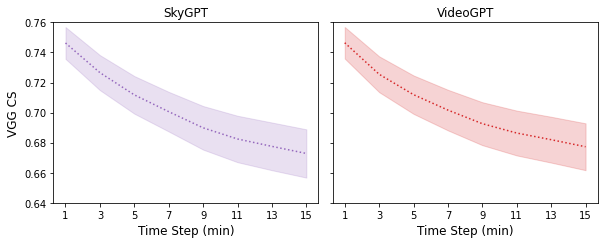

In [28]:
f,ax = plt.subplots(1,2,sharey=True)
f.set_size_inches((8.5,3.5))
timesteps = np.arange(1,17,2)

ax[0].plot(timesteps, cosine_similarity_per_frame_skygpt_mean_over_10_samplings_and_mean_over_all_sample, linestyle='dotted', color='#9467bd', markersize=6)
#ax[0].errorbar(timesteps, cosine_similarity_per_frame_videogpt_mean_over_10_samplings_and_mean_over_all_sample, cosine_similarity_per_frame_videogpt_std_over_10_samplings_and_mean_over_all_sample, fmt='-o', color='#d62728',ecolor='#d62728', markersize=6, elinewidth=1.5, capsize=5)
ax[0].fill_between(timesteps, cosine_similarity_per_frame_skygpt_mean_over_10_samplings_and_mean_over_all_sample-cosine_similarity_per_frame_skygpt_std_over_10_samplings_and_mean_over_all_sample,
           cosine_similarity_per_frame_skygpt_mean_over_10_samplings_and_mean_over_all_sample+cosine_similarity_per_frame_skygpt_std_over_10_samplings_and_mean_over_all_sample,color='#9467bd',alpha=0.2)
ax[0].set_xticks(timesteps)
ax[0].set_xlabel('Time Step (min)',fontsize=12)
ax[0].set_title('SkyGPT')
ax[0].set_ylabel('VGG CS',fontsize=12)
#ax[0].grid(linestyle='--',dashes=(5, 10),axis='y')
ax[0].set_ylim([0.64,0.76])
ax[0].set_yticks(np.arange(0.64,0.77,0.02))

#ax[1].errorbar(timesteps, cosine_similarity_per_frame_videogpt_mean_over_10_samplings_and_mean_over_all_sample, cosine_similarity_per_frame_videogpt_std_over_10_samplings_and_mean_over_all_sample, fmt='-o', color='#d62728',ecolor='#d62728', markersize=6, elinewidth=1.5, capsize=5)
ax[1].plot(timesteps, cosine_similarity_per_frame_videogpt_mean_over_10_samplings_and_mean_over_all_sample, linestyle='dotted', color='#d62728', markersize=6)
#ax[0].errorbar(timesteps, cosine_similarity_per_frame_videogpt_mean_over_10_samplings_and_mean_over_all_sample, cosine_similarity_per_frame_videogpt_std_over_10_samplings_and_mean_over_all_sample, fmt='-o', color='#d62728',ecolor='#d62728', markersize=6, elinewidth=1.5, capsize=5)
ax[1].fill_between(timesteps, cosine_similarity_per_frame_videogpt_mean_over_10_samplings_and_mean_over_all_sample-cosine_similarity_per_frame_videogpt_std_over_10_samplings_and_mean_over_all_sample,
           cosine_similarity_per_frame_videogpt_mean_over_10_samplings_and_mean_over_all_sample+cosine_similarity_per_frame_videogpt_std_over_10_samplings_and_mean_over_all_sample,color='#d62728',alpha=0.2)
ax[1].set_xticks(timesteps)
ax[1].set_xlabel('Time Step (min)',fontsize=12)
ax[1].set_title('VideoGPT')
#ax[1].grid(linestyle='--',dashes=(5, 8),axis='y')


f.tight_layout()
#plt.savefig('diversity_of_generated_samples_from_skygpt_and_videogpt.pdf', bbox_inches='tight',dpi=300)
plt.show()